# SWE - Students Analysis of Litterpickup  at Tigerduck-Beach

This workbook describes the tigerduck entry to the existing pickups at lake Geneva with a focus on Moving Bed Biofilm Reactor (MBBR) elements.

In [309]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re
from scipy.stats import norm
import scipy.stats
import statsmodels.api as sm
import seaborn
import requests
import json
import seaborn as sns
import folium

## 1) General comparison of tigerduck with lake Geneva

#### 1a) Load and prepare data

In [310]:
#read daily totals of all entries at lake Geneva
url = "http://mwshovel.pythonanywhere.com/dirt/daily-total/Lac-Léman/?format=json"
data = requests.get(url).json()
daily_totals = pd.DataFrame(data)

#calculate pieces per meter
daily_totals["pcs_m"]=daily_totals.total / daily_totals.length

#get list of collected objects for tigerduck beach
urlTiger = "http://mwshovel.pythonanywhere.com/dirt/codes/Tiger-duck-beach/?format=json"
tiger = pd.DataFrame(requests.get(urlx).json())

#### 1b) Statistics of Pieces/m

Tiger duck beach: 146    77.055556
Name: pcs_m, dtype: float64


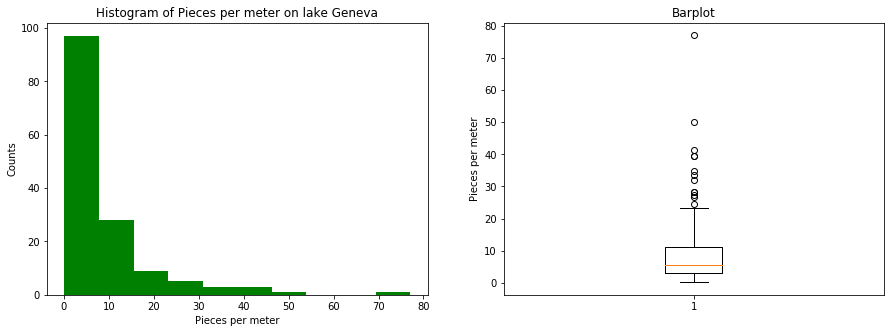

Describing Statistics:


,length,total,pcs_m
count,147.000000,147.000000,147.000000
mean,46.700680,346.748299,9.167607
std,24.987508,365.318998,10.789101
min,7.000000,5.000000,0.117647
25%,27.000000,114.000000,3.149679
50%,51.000000,234.000000,5.409836
75%,61.000000,419.500000,11.264971
max,163.000000,2028.000000,77.055556


In [311]:
# get only tigerduck entry
print('Tiger duck beach:', daily_totals.loc[daily_totals.location == 'Tiger-duck-beach', 'pcs_m'])

plt.figure(figsize=(15, 5))

#plot histogramm
plt.subplot(121)
plt.hist(daily_totals['pcs_m'], color='g')
plt.xlabel('Pieces per meter')
plt.ylabel('Counts')
plt.title('Histogram of Pieces per meter on lake Geneva')


#plot barplot
plt.subplot(122)
plt.title('Barplot')
plt.boxplot(daily_totals['pcs_m'])
plt.ylabel('Pieces per meter')

plt.savefig('statistics.png')

plt.show()


print('Describing Statistics:')
daily_totals.describe()

**Observation**: Our colleciton is the maximum point and considered as clear outlier in this dataset..

## 2) Moving Bed Biofilm Reactor (MBBR) Elements

The mlw code of biomass holder is *G91*
#### 2a) Load and Prepare Data

In [312]:
#load plastic codes
csvUrl = "https://mwshovel.pythonanywhere.com/static/newCriteria.csv"
mlwcodes = pd.read_csv(csvUrl, index_col= 'code')

#load location of beaches
beachUrl = "http://mwshovel.pythonanywhere.com/dirt/beaches/Lac-L%C3%A9man/"
beaches = pd.DataFrame(requests.get(beachUrl).json())

#load all inventories of lake Geneva
codeUrl = "https://mwshovel.pythonanywhere.com/dirt/codes/Lac-Léman/"
inventory = pd.DataFrame(requests.get(codeUrl).json()).drop(columns = ['owner', 'project_id'])

#get only entries for G91 and calculate mbbr per meter
mbbr = inventory[inventory['code_id']== 'G91'].copy()
mbbr['density']=mbbr['quantity']/mbbr['length']

In [313]:
#join to get location information
mbbr_places = mbbr.merge(beaches, left_on='location_id', right_on='location', how='left')

#### 2b) Print out distribution of MBBR samples

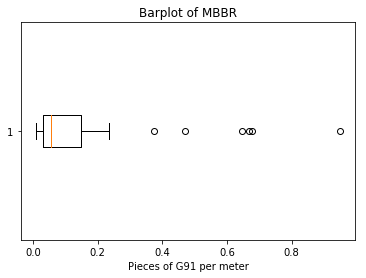

In [314]:
#create boxplot
plt.boxplot(mbbr['density'], vert=False)
plt.title('Barplot of MBBR')
plt.xlabel('Pieces of G91 per meter')
plt.show()

In [315]:
#define function for mapping density as circle markers on folium map
def map_mbbr(data):
    
    # generate a new map with cent
    folium_map = folium.Map(location=[46.409072, 6.486528],
                        zoom_start=10.4,
                        tiles="stamenterrain",
                        width='100%')
    
    for index, row in data.iterrows():

            radius = row['density']*50
            location = (float(data['latitude'][index]), float(data['longitude'][index]))
            popup_text = "Location: %s , \t Density: %f " % (row['location_id'], row['density'])
            
            #add marker to map
            folium.CircleMarker(location,
                                radius=radius,
                                popup=popup_text,
                                fill=False).add_to(folium_map)
    return folium_map
                            

In [316]:
#display & save maps
m= map_mbbr(mbbr_places)
m.save('Mbbr_densities_map')
m

To complete:
    -clustering samples in three big clusters: Geneva, Lausanne, 